In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../")
import setigen as stg

from astropy import units as u

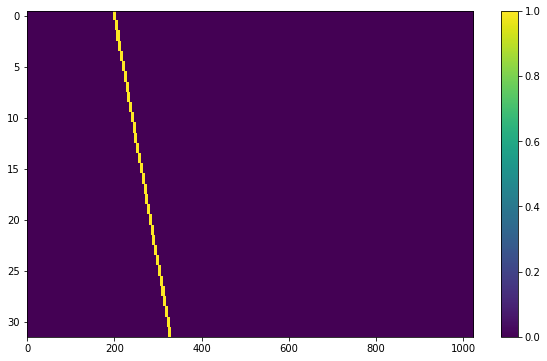

In [2]:
fil = Waterfall('../setigen/assets/placeholder.fil')
frame = stg.Frame(fil=fil)
signal = frame.add_signal(stg.constant_path(f_start = frame.fs[200], 
                                            drift_rate = -0.000004),
                          stg.constant_t_profile(level = 1),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

In [4]:
rate = u.pixel / u.Hz
rate

Unit("pix / Hz")

In [5]:
((5*u.Hz) * rate)

<Quantity 5. pix>

In [6]:
import numpy as np
np.random.normal(2, 2, (2,2))

array([[-2.35186095,  0.72592871],
       [ 0.99431968, -0.86202857]])

In [7]:
np.maximum(np.random.normal(2, 2, (2,2)), 2)

array([[2.        , 4.64170041],
       [4.19713249, 2.        ]])

In [8]:
stg.sample_from_array(np.array([0, 2, 4]), (3, 10))

TypeError: sample_from_array() takes 1 positional argument but 2 were given

In [9]:
array = [1,2,3,4]
np.random.randint(0, len(array))

1

In [10]:
(np.random.normal(0, 1, (2,2)) * u.m) * rate

<Quantity [[ 0.19697629, -1.59593947],
           [-0.49646816,  0.65885002]] m pix / Hz>

In [11]:
u.m

Unit("m")

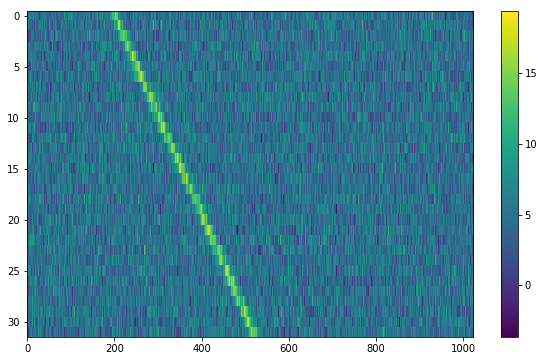

In [2]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024,
                  tchans=32,
                  df=-1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s,
                  fch1=6.000464843051508*u.GHz)
noise = frame.add_noise(5, 2, 0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-10*u.Hz/u.s),
                          stg.constant_t_profile(level=10),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10,6))
plt.imshow(frame.data, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

In [3]:
frame.get_info()

{'fil': None,
 'header': None,
 'fchans': 1024,
 'df': -1.3969838619232178,
 'fch1': 6000464843.051508,
 'tchans': 32,
 'dt': 1.4316557653333333,
 'shape': (32, 1024),
 'data': array([[ 4.34129072,  3.45435288,  4.48971475, ...,  8.40703608,
          4.02530235,  5.46383183],
        [ 6.02250196,  4.05245595,  0.51967784, ...,  4.56667449,
          4.51598192,  6.7466118 ],
        [ 9.16234678,  4.16581441,  1.38536202, ...,  7.67447603,
          7.01627434,  6.35196729],
        ...,
        [ 3.4589974 ,  6.81136766,  5.15745301, ..., 10.65554686,
          8.56862159,  3.47083969],
        [ 3.12110516,  1.81882564,  6.9704557 , ...,  6.34305484,
          1.28500479,  5.97458451],
        [ 2.41968448,  3.17370184,  6.47378846, ...,  2.35301144,
          3.61102686,  4.15838092]]),
 'fs': array([6.00046484e+09, 6.00046484e+09, 6.00046484e+09, ...,
        6.00046342e+09, 6.00046342e+09, 6.00046341e+09]),
 'ts': array([ 0.        ,  1.43165577,  2.86331153,  4.2949673 ,  5.726

In [33]:
flat_data = frame.data.flatten()
np.mean(np.sort(flat_data)[::-1][int((0.01)*len(flat_data)):])

5.07429727767295

In [34]:
np.std(np.sort(flat_data)[::-1][int((0.01)*len(flat_data)):])

2.0780179505040492

In [25]:
all([x > 0 for x in [1,2,3]])

True

In [24]:
u.Quantity

astropy.units.quantity.Quantity

In [28]:
(1*u.m).unit == (u.m)

True

In [37]:
x = {u.m: 1, u.cm: 2}
list(x.keys())[0]

Unit("m")

In [42]:
([1,2]*u.m)[0]

<Quantity 1. m>

In [32]:
not (None or None or None)

False

In [84]:
np.array(4)

array(4)

In [34]:
x = np.load('../setigen/assets/sample_noise_params.npy')

In [39]:
x[1040]

array([443275.96875   , 229717.484375  ,   5760.84667969])

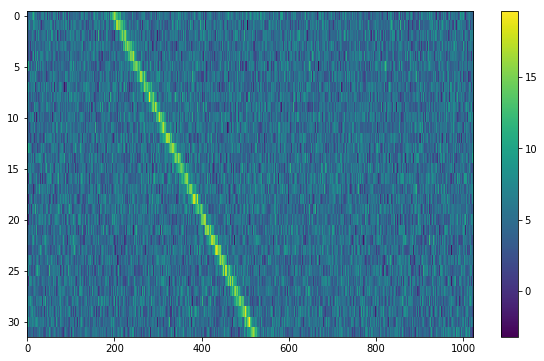

In [2]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-1.3969838619232178*u.Hz,
                  dt=1.4316557653333333*u.s,
                  fch1=6.000464843051508*u.GHz)
noise = frame.add_noise(5, 2, 0)
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-10*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=30)),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.data, aspect='auto')
plt.colorbar()
plt.savefig('test.png')
plt.show()

(0.0, 0.0, 0.0) (0.0, 0.0, 0.0)
(5.002122277370276, 1.9917086734621967, 0.0) (5, 2, 0.0)
(5.187977534286986, 2.317235223081305, 0.0) (5, 2, 0.0)


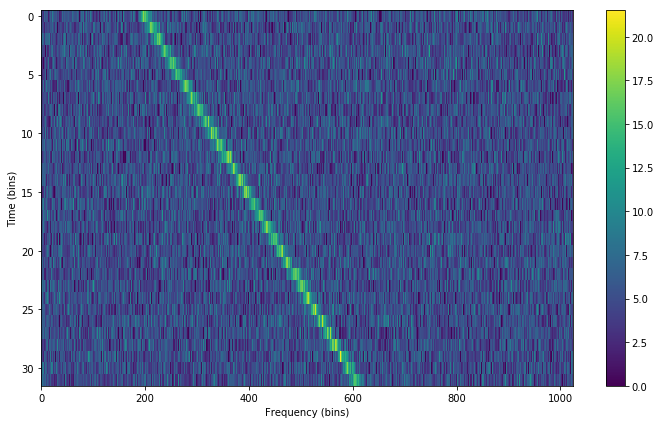

In [39]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.Hz)
print(frame.get_total_stats(), frame.get_noise_stats())
noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)
print(frame.get_total_stats(), frame.get_noise_stats())
signal = frame.add_signal(stg.constant_path(f_start=frame.fs[200], 
                                            drift_rate=-2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=30)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))
print(frame.get_total_stats(), frame.get_noise_stats())

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
plt.savefig('../doc/source/example.pdf', bbox_inches='tight')
plt.show()

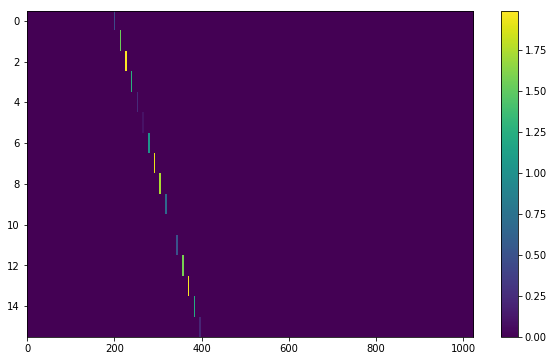

In [14]:
import setigen as stg
import numpy as np

# Define time and frequency arrays, essentially labels for the 2D data array
tsamp = 18.25361108
fch1 = 6095.214842353016
df = -2.7939677238464355e-06
fchans = 1024
tchans = 16
fs = np.arange(fch1, fch1 + fchans * df, df)
ts = np.arange(0, tchans * tsamp, tsamp)

# Generate the signal
signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                      stg.sine_t_profile(period = 100, amplitude = 1, level = 1),
                      stg.box_f_profile(width = 0.00001),
                      stg.constant_bp_profile(level = 1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig.savefig("basic_signal.png", bbox_inches='tight')

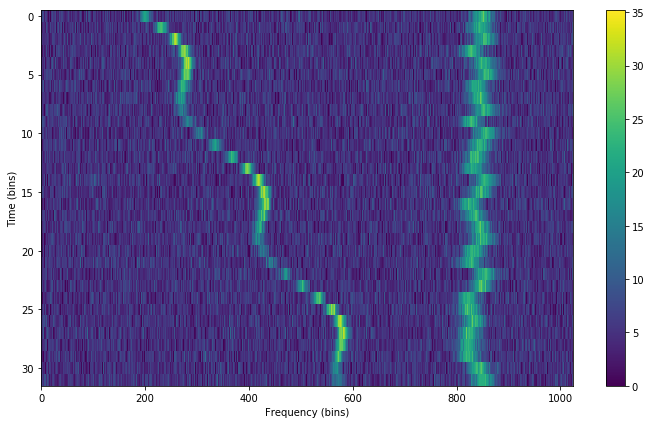

In [40]:
from astropy import units as u
sys.path.append("../")
import setigen as stg

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=-2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.Hz)

noise = frame.add_noise(x_mean=5, x_std=2, x_min=0)

signal = frame.add_signal(stg.sine_path(f_start = frame.fs[200], drift_rate = -2*u.Hz/u.s,
                                    period = 20, amplitude = 100*u.Hz),
                          stg.sine_t_profile(period=20, 
                                             amplitude=frame.compute_intensity(snr=25), 
                                             level=frame.compute_intensity(snr=50)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

signal = frame.add_signal(stg.choppy_rfi_path(f_start = frame.fs[840], drift_rate = 0*u.Hz/u.s,
                                    spread = 100*u.Hz),
                          stg.constant_t_profile(level=frame.compute_intensity(snr=50)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(db=False), aspect='auto')
plt.xlabel('Frequency (bins)')
plt.ylabel('Time (bins)')
plt.colorbar()
plt.tight_layout()
plt.savefig('../doc/source/flashy_synthetic.pdf', bbox_inches='tight')
plt.show()

In [7]:
frame.save_fil('test.fil')

blimpy.waterfall INFO     Conversion time: 0.17sec


In [16]:
a = 1
b = 1.
a == b == 1

True

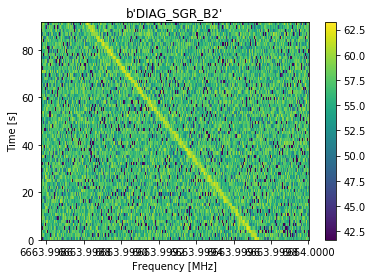

In [8]:
Waterfall('test.fil').plot_waterfall()

In [44]:
frame.get_intensity(100)

3800531.9822241594

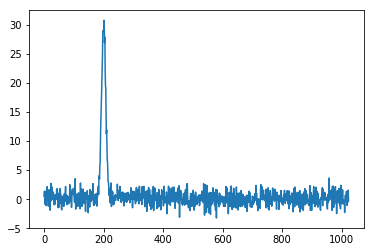

In [29]:
plt.plot((np.mean(frame.data, axis=0) - frame.noise_mean) / frame.noise_std * np.sqrt(frame.tchans))

In [15]:
frame.min

16069.857421875

In [38]:
a = A()
a.a, a.b

(2, 2)

In [40]:
a.a

2

In [41]:
a.b

3